In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!pip install seaborn

In [4]:
data = pd.read_csv('../data/girls.csv')

In [5]:
data.head()

,Month,Year,Bust,Waist,Hips,Height,Weight
0,December,1953,91,61,91,165,54
1,March,1954,86,61,89,168,54
2,July,1955,91,61,91,166,52
3,December,1955,91,61,91,166,52
4,July,1956,91,61,86,157,48


# Признаки по одному

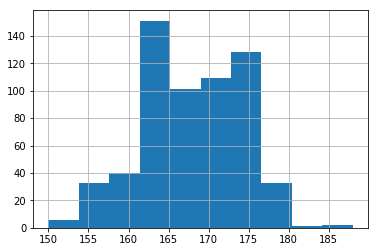

In [7]:
data['Height'].hist();

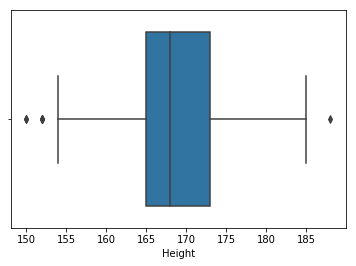

In [8]:
sns.boxplot(data['Height']);

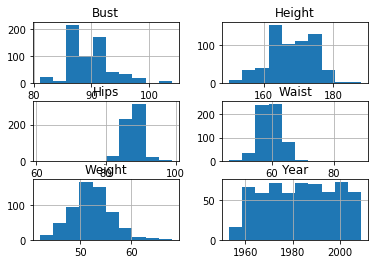

In [9]:
data.hist();

In [10]:
data['Month'].value_counts().head()

December    54
November    52
July        52
October     51
May         51
Name: Month, dtype: int64

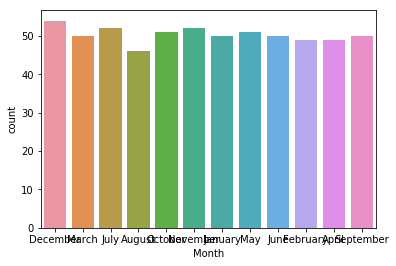

In [13]:
sns.countplot(data['Month']);

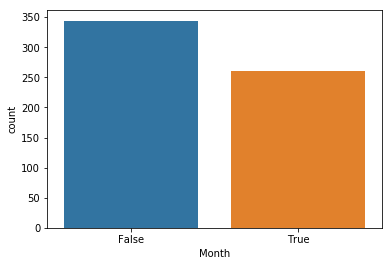

In [21]:
sns.countplot(data['Month'].isin(data['Month'].value_counts().head().index));

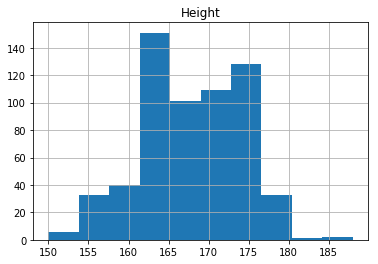

In [25]:
col = [f for f in data.columns if 'Height' in f]
data[col].hist();

In [ ]:
sns.pairplot(data.columns)

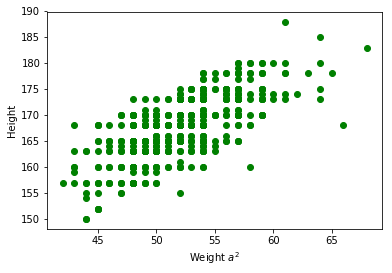

In [38]:
plt.scatter(data['Weight'], data['Height'], color="green");
plt.xlabel(r'Weight $a^2$');
plt.ylabel('Height');

In [44]:
data['is_fat'] = data['Weight'] > 60

In [45]:
data.head()

,Month,Year,Bust,Waist,Hips,Height,Weight,is_fat
0,December,1953,91,61,91,165,54,False
1,March,1954,86,61,89,168,54,False
2,July,1955,91,61,91,166,52,False
3,December,1955,91,61,91,166,52,False
4,July,1956,91,61,86,157,48,False


In [46]:
dr = {True: 'blue', False: 'red'}
data['is_fat'].map(dr)

0       red
1       red
2       red
3       red
4       red
5       red
6       red
7       red
8       red
9       red
10      red
11      red
12      red
13      red
14      red
15      red
16     blue
17      red
18      red
19      red
20      red
21      red
22      red
23      red
24      red
25      red
26      red
27      red
28      red
29      red
       ... 
574     red
575     red
576     red
577     red
578     red
579     red
580     red
581     red
582     red
583     red
584     red
585     red
586     red
587     red
588     red
589     red
590     red
591     red
592     red
593     red
594     red
595     red
596     red
597     red
598     red
599     red
600     red
601     red
602     red
603     red
Name: is_fat, Length: 604, dtype: object

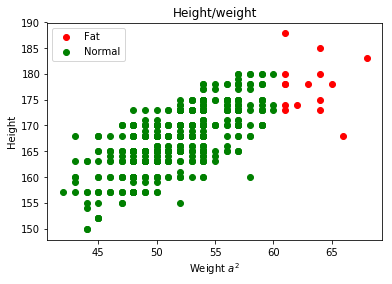

In [57]:
plt.scatter(data[data['is_fat']]['Weight'], data[data['is_fat']]['Height'], color='red', label = 'Fat');
plt.scatter(data[~data['is_fat']]['Weight'], data[~data['is_fat']]['Height'], color='green', label = 'Normal');
plt.xlabel(r'Weight $a^2$');
plt.ylabel('Height');
plt.legend();
plt.title('Height/weight');

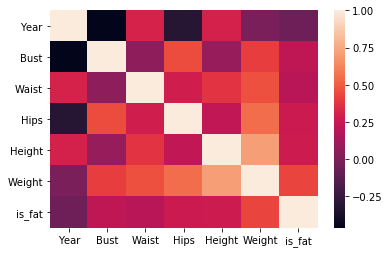

In [60]:
sns.heatmap(data.corr());

In [63]:
data.drop(['is_fat'], axis = 1, inplace = True)

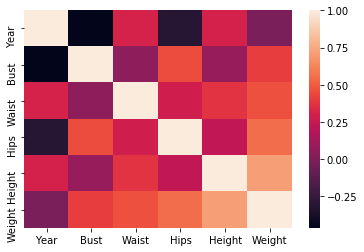

In [64]:
sns.heatmap(data.corr());

# Колич./ категориальный

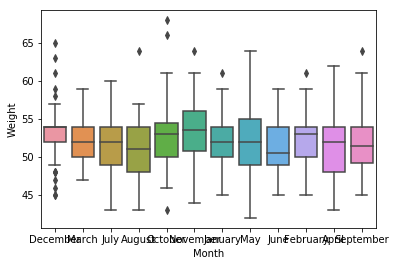

In [66]:
sns.boxplot(x='Month', y='Weight', data = data);

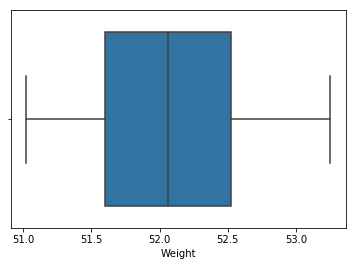

In [74]:
sns.boxplot(data.groupby('Month')['Weight'].mean());

In [75]:
from sklearn.manifold import TSNE